## Importing Tensorflow:

In [1]:
import tensorflow as tf
from tensorflow import keras

## The version of Tensorflow in our system:

In [2]:
print(tf.__version__)

2.7.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt


## Importing data and Loading data:

In [4]:
mnist = keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Looking at the shape of our data:

In [6]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


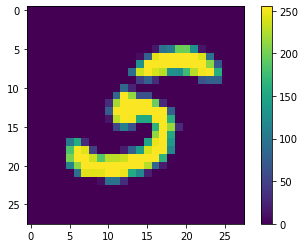

In [7]:
plt.figure()
plt.imshow(x_train[29293])
plt.colorbar()

## Dividing each pixels by 255 as we need our pixels between 0 and 1:

In [8]:
x_train = x_train/255
x_test = x_test/255

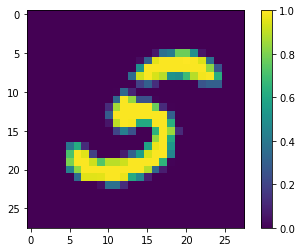

In [9]:
plt.figure()
plt.imshow(x_train[29293])
plt.colorbar()

## Model building with Tensorflow and its Keras API:

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [11]:
model = Sequential() #Creating a sequential layers.


In [12]:
model.add(Flatten(input_shape = (28,28))) #Flattens the input matrix as vector.
model.add(Dense(232,activation = 'relu')) #Building Densely connected layers.
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

## Looking at our model summary:

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 232)               182120    
                                                                 
 dense_1 (Dense)             (None, 32)                7456      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 189,906
Trainable params: 189,906
Non-trainable params: 0
_________________________________________________________________


## Compiling the model with ADAM optimization technique:

In [14]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

## Fitting the model into training sets:

In [15]:
model.fit(x_train, y_train, epochs = 30, batch_size = 5000)

Epoch 1/30
12/12 [==============================] - 1s 29ms/step - loss: 1.7148 - accuracy: 0.5072
Epoch 2/30
12/12 [==============================] - 0s 25ms/step - loss: 0.7401 - accuracy: 0.8071
Epoch 3/30
12/12 [==============================] - 0s 26ms/step - loss: 0.4226 - accuracy: 0.8816
Epoch 4/30
12/12 [==============================] - 0s 25ms/step - loss: 0.3236 - accuracy: 0.9089
Epoch 5/30
12/12 [==============================] - 0s 24ms/step - loss: 0.2769 - accuracy: 0.9213
Epoch 6/30
12/12 [==============================] - 0s 24ms/step - loss: 0.2457 - accuracy: 0.9309
Epoch 7/30
12/12 [==============================] - 0s 26ms/step - loss: 0.2235 - accuracy: 0.9373
Epoch 8/30
12/12 [==============================] - 0s 28ms/step - loss: 0.2049 - accuracy: 0.9427
Epoch 9/30
12/12 [==============================] - 0s 28ms/step - loss: 0.1899 - accuracy: 0.9473
Epoch 10/30
12/12 [==============================] - 0s 30ms/step - loss: 0.1770 - accuracy: 0.9507
Epoch 11/

## Evaluating model accuracy on test sets:

In [16]:
model.evaluate(x_test,y_test,batch_size=5000)

2/2 [==============================] - 0s 16ms/step - loss: 0.0893 - accuracy: 0.9722


[0.08932223916053772, 0.9721999764442444]

### The test accuracy is nearly close to train accuracy which shows that our model is well generalized model.

## Making the prediction on a batch:

In [17]:
predictions = model.predict_on_batch(x_test)

In [18]:
predictions

array([[6.49948151e-06, 3.28133615e-06, 1.26175320e-04, ...,
        9.97291744e-01, 3.62332025e-06, 2.90843658e-04],
       [7.21495255e-08, 1.68400162e-04, 9.99635339e-01, ...,
        3.00996783e-09, 3.96494625e-06, 1.08612161e-10],
       [1.07922542e-05, 9.92776155e-01, 1.58518658e-03, ...,
        1.95683097e-03, 2.17802962e-03, 3.60268095e-05],
       ...,
       [7.56122986e-09, 1.88946672e-08, 1.06686375e-08, ...,
        1.28909505e-05, 7.48373786e-05, 4.71134932e-04],
       [9.45902627e-08, 1.48346615e-07, 8.78979001e-10, ...,
        2.22484360e-08, 7.41361931e-04, 7.56928831e-09],
       [4.69748016e-07, 4.65107050e-11, 1.30827184e-05, ...,
        2.33089286e-12, 1.92354914e-08, 1.15244780e-09]], dtype=float32)

In [19]:
np.argmax(predictions[3]) #Argmax returns the index which will be having maximum probability.

0

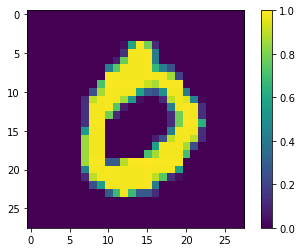

In [20]:
plt.figure()
plt.imshow(x_test[3])
plt.colorbar()

## Creating our own prediction function which even plots the digit:

In [21]:
def do_prediction(i):
    
    plt.figure()
    plt.imshow(x_test[i])
    plt.colorbar()

    print('The predicted number by the model is :',np.argmax(predictions[i]))
    return 
    

The predicted number by the model is : 4


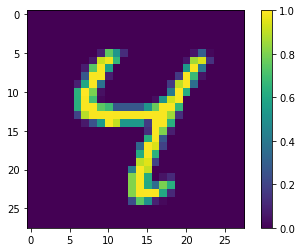

In [22]:
do_prediction(6)